In [1]:
import sys
import os
sys.path.append("../")
from magnolia import *
%matplotlib inline
import yt
import matplotlib.pyplot as plt
import numpy as np

def _magnetic_energy1(field, data):
    return 1.0/(8*np.pi) * data['magnetic_field_strength']**2 * data['clr1'] * data['cell_volume']
yt.add_field(('gas','magnetic_energy1'), function=_magnetic_energy1, units='erg')

def _magnetic_energy2(field, data):
    return 1.0/(8*np.pi) * data['magnetic_field_strength']**2 * data['clr2'] * data['cell_volume']
yt.add_field(('gas','magnetic_energy2'), function=_magnetic_energy2, units='erg')

def _magnetic_energy_total(field, data):
    return data['magnetic_energy1']+data['magnetic_energy2']
yt.add_field(('gas','magnetic_energy_total'), function=_magnetic_energy_total, units='erg')

def _magnetic_pressure(field, data):
    return data['magnetic_energy_total']/data['cell_volume']
yt.add_field(('gas','magnetic_pressure'), function=_magnetic_pressure, units='erg/cm**3')


/home/jzuhone/Source/yt/yt/fields/local_fields.py:46: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  warnings.warn("Because 'sampling_type' not specified, yt will "


In [2]:
ds0000 = yt.load("/data/mimir/jzuhone/data/fid_mag/1to10_b1/fiducial_1to10_b1_mag_hdf5_plt_cnt_0000")
ds0500 = yt.load("/data/mimir/jzuhone/data/fid_mag/1to10_b1/fiducial_1to10_b1_mag_hdf5_plt_cnt_0500")

yt : [INFO     ] 2018-03-05 20:50:26,936 Particle file found: fiducial_1to10_b1_mag_hdf5_part_0000
yt : [INFO     ] 2018-03-05 20:50:26,974 Parameters: current_time              = 0.0
yt : [INFO     ] 2018-03-05 20:50:26,976 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2018-03-05 20:50:26,978 Parameters: domain_left_edge          = [ -2.20000000e+25  -2.20000000e+25  -2.20000000e+25]
yt : [INFO     ] 2018-03-05 20:50:26,980 Parameters: domain_right_edge         = [  2.20000000e+25   2.20000000e+25   2.20000000e+25]
yt : [INFO     ] 2018-03-05 20:50:26,981 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2018-03-05 20:50:27,029 Particle file found: fiducial_1to10_b1_mag_hdf5_part_0500
yt : [INFO     ] 2018-03-05 20:50:27,059 Parameters: current_time              = 3.15615270434e+17
yt : [INFO     ] 2018-03-05 20:50:27,060 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2018-03-05 20:50:27,062 Parameters: domain_left_edge          = 

In [6]:
v,c = ds0500.find_min('gpot')

yt : [INFO     ] 2018-03-01 06:43:39,109 Min Value is -7.56901e+16 at 1686523416664126806556672.0000000000000000 -698242178873683072778240.0000000000000000 10742187367287431888896.0000000000000000


yt : [INFO     ] 2018-03-01 06:50:48,873 xlim = -10656186907185170301845504.000000 14029233740513423914958848.000000
yt : [INFO     ] 2018-03-01 06:50:48,874 ylim = -13040952502722980181180416.000000 11644468144975614035623936.000000
yt : [INFO     ] 2018-03-01 06:50:48,876 xlim = -10656186907185170301845504.000000 14029233740513423914958848.000000
yt : [INFO     ] 2018-03-01 06:50:48,877 ylim = -13040952502722980181180416.000000 11644468144975614035623936.000000
yt : [INFO     ] 2018-03-01 06:50:48,880 Making a fixed resolution buffer of (('gas', 'magnetic_field_strength')) 800 by 800



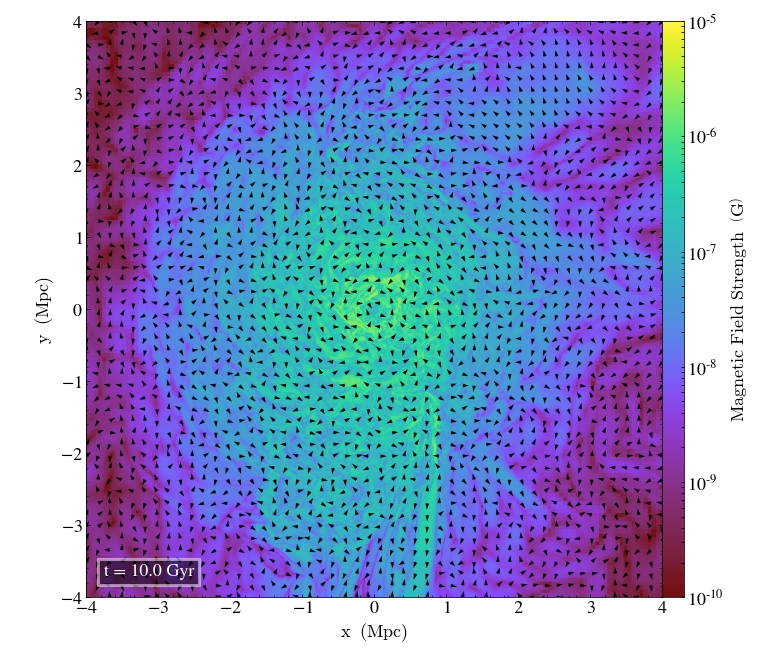

In [10]:
axis = 'z'
slc = yt.SlicePlot(ds0500, axis, 'magnetic_field_strength', width = (8,'Mpc'), center = c)
slc.annotate_timestamp(redshift=False,draw_inset_box=True)

zlim1=1e-10
zlim2=1e-5
slc.set_zlim('magnetic_field_strength',zlim1,zlim2)

slc.annotate_magnetic_field(normalize=True)
    
slc.show()

In [11]:
ds0500.derived_field_list

[('all', 'mesh_id'),
 ('all', 'particle_accx'),
 ('all', 'particle_accy'),
 ('all', 'particle_accz'),
 ('all', 'particle_angular_momentum'),
 ('all', 'particle_angular_momentum_magnitude'),
 ('all', 'particle_angular_momentum_x'),
 ('all', 'particle_angular_momentum_y'),
 ('all', 'particle_angular_momentum_z'),
 ('all', 'particle_blk'),
 ('all', 'particle_clr1'),
 ('all', 'particle_clr2'),
 ('all', 'particle_cylindrical_velocity_theta'),
 ('all', 'particle_cylindrical_velocity_z'),
 ('all', 'particle_dens'),
 ('all', 'particle_gpot'),
 ('all', 'particle_halo'),
 ('all', 'particle_index'),
 ('all', 'particle_magp'),
 ('all', 'particle_magx'),
 ('all', 'particle_magy'),
 ('all', 'particle_magz'),
 ('all', 'particle_mass'),
 ('all', 'particle_metl'),
 ('all', 'particle_oacx'),
 ('all', 'particle_oacy'),
 ('all', 'particle_oacz'),
 ('all', 'particle_ones'),
 ('all', 'particle_position'),
 ('all', 'particle_position_cylindrical_radius'),
 ('all', 'particle_position_cylindrical_theta'),
 ('a

In [22]:
v1,c1=ds0000.find_min('gpot')

yt : [INFO     ] 2018-03-01 07:04:10,018 Min Value is -7.40057e+16 at 956054675688581438111744.0000000000000000 -1428710919849228441223168.0000000000000000 -10742187367287431888896.0000000000000000


yt : [INFO     ] 2018-03-01 07:16:23,334 xlim = -4484831745260521747644416.000000 7857878578588775360757760.000000
yt : [INFO     ] 2018-03-01 07:16:23,335 ylim = -6869597340798331626979328.000000 5473112983050965481422848.000000
yt : [INFO     ] 2018-03-01 07:16:23,337 xlim = -4484831745260521747644416.000000 7857878578588775360757760.000000
yt : [INFO     ] 2018-03-01 07:16:23,338 ylim = -6869597340798331626979328.000000 5473112983050965481422848.000000
yt : [INFO     ] 2018-03-01 07:16:23,340 Making a fixed resolution buffer of (('gas', 'magnetic_field_strength')) 800 by 800



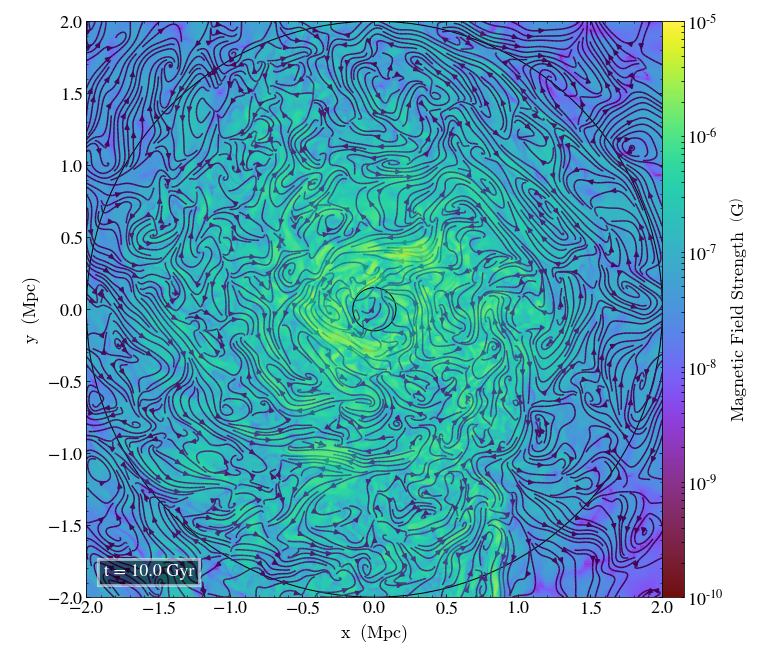

yt : [INFO     ] 2018-03-01 07:16:37,324 xlim = -5215300486236067116089344.000000 7127409837613229992312832.000000
yt : [INFO     ] 2018-03-01 07:16:37,325 ylim = -7600066081773876995424256.000000 4742644242075420112977920.000000
yt : [INFO     ] 2018-03-01 07:16:37,327 xlim = -5215300486236067116089344.000000 7127409837613229992312832.000000
yt : [INFO     ] 2018-03-01 07:16:37,329 ylim = -7600066081773876995424256.000000 4742644242075420112977920.000000
yt : [INFO     ] 2018-03-01 07:16:37,330 Making a fixed resolution buffer of (('gas', 'magnetic_field_strength')) 800 by 800



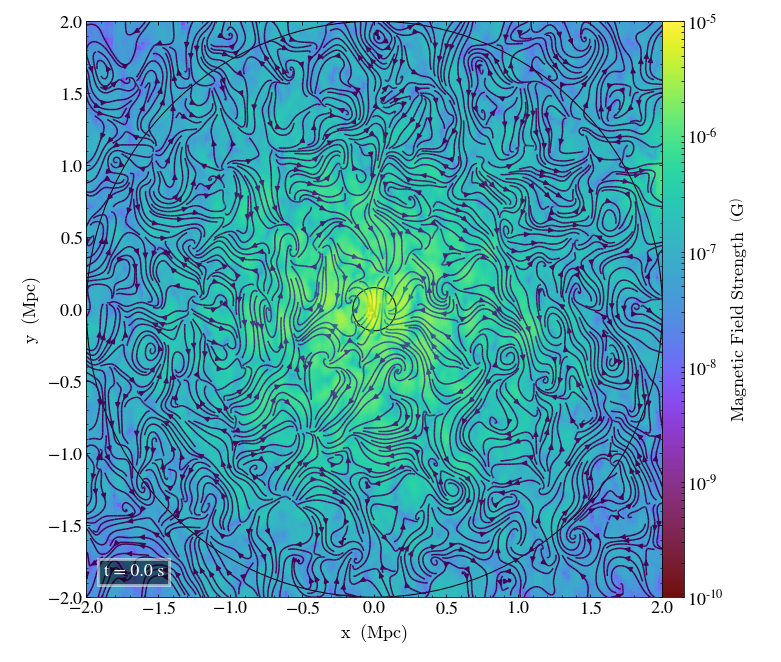

In [30]:
axis = 'z'
slc = yt.SlicePlot(ds0500, axis, 'magnetic_field_strength', width = (4,'Mpc'), center = c)
slc.annotate_timestamp(redshift=False,draw_inset_box=True)

zlim1=1e-10
zlim2=1e-5
slc.set_zlim('magnetic_field_strength',zlim1,zlim2)

slc.annotate_sphere(c, radius=(150, 'kpc'),
                  circle_args={'color':'black'})
slc.annotate_sphere(c, radius=(2, 'Mpc'),
                  circle_args={'color':'black'})
slc.annotate_streamlines('magnetic_field_x', 'magnetic_field_y', 
                         factor=16, density = 5, field_color='magnetic_field_strength')
    
slc.show()

slc1 = yt.SlicePlot(ds0000, axis, 'magnetic_field_strength', width = (4,'Mpc'), center = c1)
slc1.annotate_timestamp(redshift=False,draw_inset_box=True)

zlim1=1e-10
zlim2=1e-5
slc1.set_zlim('magnetic_field_strength',zlim1,zlim2)

slc1.annotate_sphere(c1, radius=(150, 'kpc'),
                  circle_args={'color':'black'})
slc1.annotate_sphere(c1, radius=(2, 'Mpc'),
                  circle_args={'color':'black'})
slc1.annotate_streamlines('magnetic_field_x', 'magnetic_field_y',
                          factor=16, density = 5, field_color='magnetic_field_strength')
    
slc1.show()

yt : [INFO     ] 2018-03-01 07:28:24,262 Particle file found: fiducial_1to1_b0_mag_hdf5_part_0000
yt : [INFO     ] 2018-03-01 07:28:24,293 Parameters: current_time              = 0.0
yt : [INFO     ] 2018-03-01 07:28:24,294 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2018-03-01 07:28:24,296 Parameters: domain_left_edge          = [ -2.20000000e+25  -2.20000000e+25  -2.20000000e+25]
yt : [INFO     ] 2018-03-01 07:28:24,297 Parameters: domain_right_edge         = [  2.20000000e+25   2.20000000e+25   2.20000000e+25]
yt : [INFO     ] 2018-03-01 07:28:24,298 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2018-03-01 07:28:24,338 Particle file found: fiducial_1to1_b0_mag_hdf5_part_0500
yt : [INFO     ] 2018-03-01 07:28:24,364 Parameters: current_time              = 3.15581966677e+17
yt : [INFO     ] 2018-03-01 07:28:24,365 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2018-03-01 07:28:24,367 Parameters: domain_left_edge          = [ 


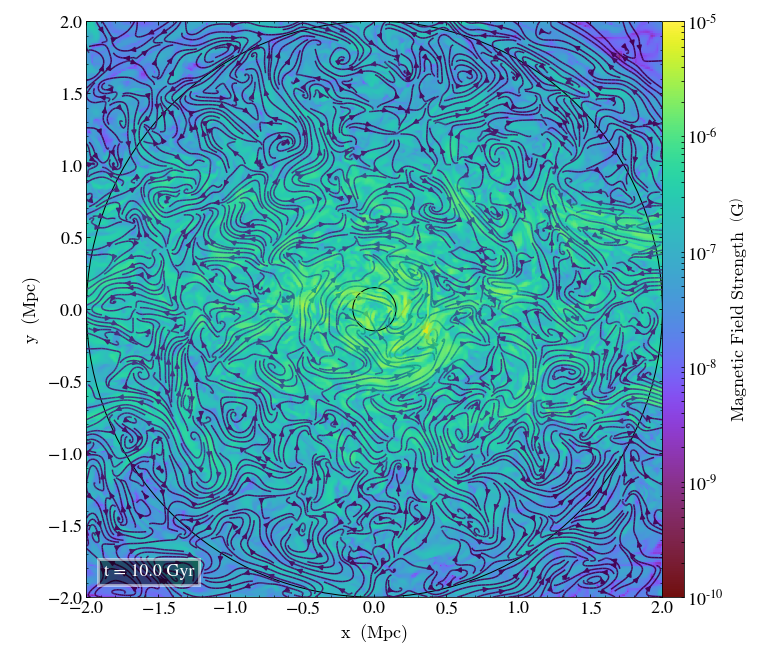

yt : [INFO     ] 2018-03-01 07:29:19,228 xlim = -10959387092980072766767104.000000 1383323230869223804764160.000000
yt : [INFO     ] 2018-03-01 07:29:19,230 ylim = -6173743383653538055847936.000000 6168966940195759052554240.000000
yt : [INFO     ] 2018-03-01 07:29:19,232 xlim = -10959387092980072766767104.000000 1383323230869223804764160.000000
yt : [INFO     ] 2018-03-01 07:29:19,233 ylim = -6173743383653538055847936.000000 6168966940195759052554240.000000
yt : [INFO     ] 2018-03-01 07:29:19,235 Making a fixed resolution buffer of (('gas', 'magnetic_field_strength')) 800 by 800



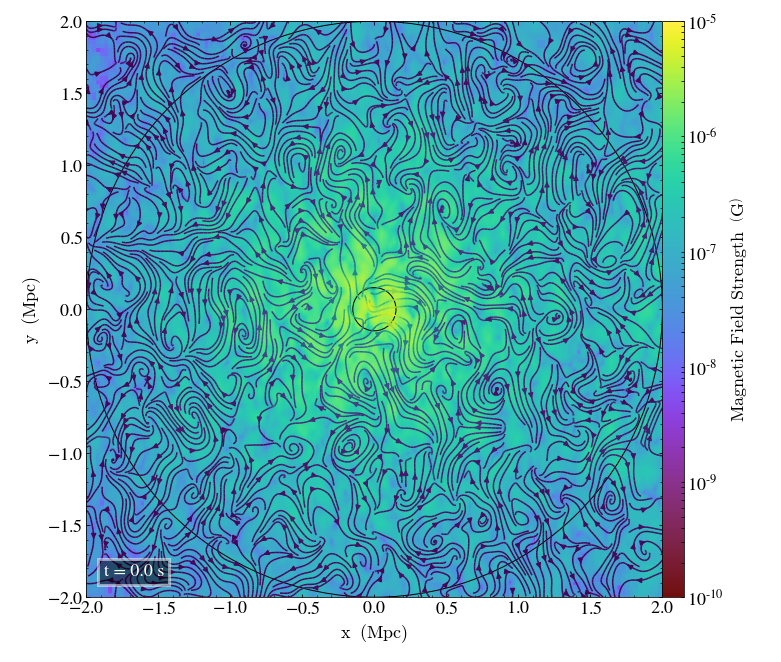

In [35]:
ds00001 = yt.load("/data/mimir/jzuhone/data/fid_mag/1to1_b0/fiducial_1to1_b0_mag_hdf5_plt_cnt_0000")
ds05001 = yt.load("/data/mimir/jzuhone/data/fid_mag/1to1_b0/fiducial_1to1_b0_mag_hdf5_plt_cnt_0500")

# v11,c11=ds0500.find_min('gpot')
# v111,c111=ds0000.find_min('gpot')

axis = 'z'
slc = yt.SlicePlot(ds05001, axis, 'magnetic_field_strength', width = (4,'Mpc'), center = c_100part0500)
slc.annotate_timestamp(redshift=False,draw_inset_box=True)

zlim1=1e-10
zlim2=1e-5
slc.set_zlim('magnetic_field_strength',zlim1,zlim2)

slc.annotate_sphere(c_100part0500, radius=(150, 'kpc'),
                  circle_args={'color':'black'})
slc.annotate_sphere(c_100part0500, radius=(2, 'Mpc'),
                  circle_args={'color':'black'})
slc.annotate_streamlines('magnetic_field_x', 'magnetic_field_y', 
                         factor=16, density = 5, field_color='magnetic_field_strength')
    
slc.show()

slc1 = yt.SlicePlot(ds00001, axis, 'magnetic_field_strength', width = (4,'Mpc'), center = c_100part0000)
slc1.annotate_timestamp(redshift=False,draw_inset_box=True)

zlim1=1e-10
zlim2=1e-5
slc1.set_zlim('magnetic_field_strength',zlim1,zlim2)

slc1.annotate_sphere(c_100part0000, radius=(150, 'kpc'),
                  circle_args={'color':'black'})
slc1.annotate_sphere(c_100part0000, radius=(2, 'Mpc'),
                  circle_args={'color':'black'})
slc1.annotate_streamlines('magnetic_field_x', 'magnetic_field_y',
                          factor=16, density = 5, field_color='magnetic_field_strength')
    
slc1.show()


In [34]:
c_100part0000 = find_center(ds00001)
c_100part0500 = find_center(ds05001)

Finding gravitational potential minimum
Finding gravitational potential minimum


In [32]:
c_100part

YTArray([ -4.78803193e+24,  -2.38822173e+21,  -8.40980443e+20]) code_length

0000
after 0000
0500
after 0500



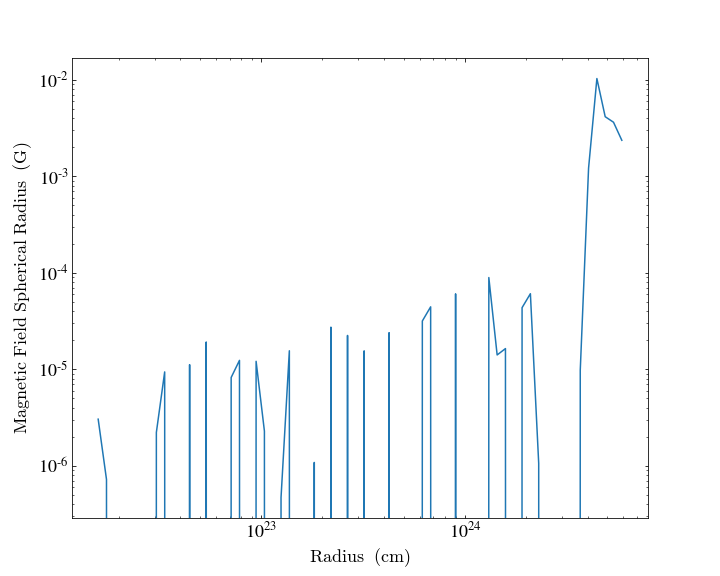


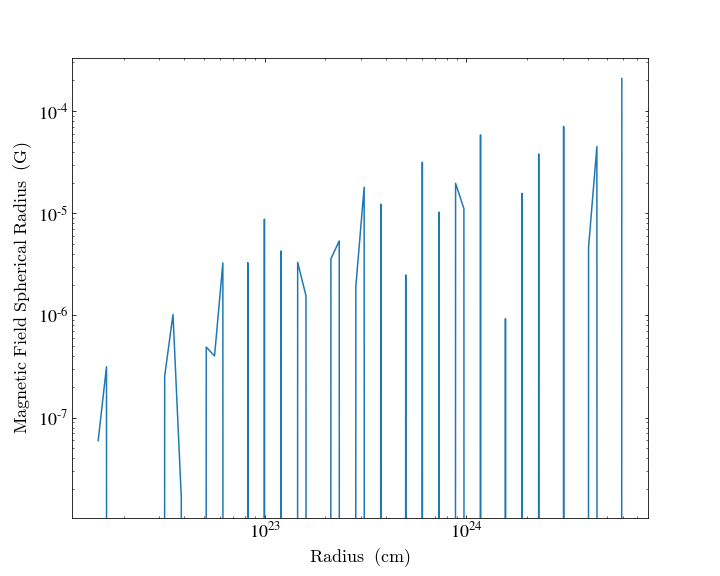

In [37]:
my_sphere0000 = ds00001.sphere(c_100part0000, (2, "Mpc"))
my_sphere0500 = ds05001.sphere(c_100part0500, (2, "Mpc"))
print("0000")
plot0000 = yt.ProfilePlot(my_sphere0000, "radius", ["magnetic_field_spherical_radius"],
                      weight_field=None)
print("after 0000")
print("0500")
plot0500 = yt.ProfilePlot(my_sphere0500, "radius", ["magnetic_field_spherical_radius"],
                      weight_field=None)
print("after 0500")
plot0000.show()
plot0500.show()

In [41]:
profile = plot0500.profiles[0]

In [42]:
profile

In [44]:
print(profile.x.in_units('Mpc'))

[ 0.00484224  0.00532416  0.00585403  0.00643664  0.00707724  0.00778158
  0.00855603  0.00940755  0.01034382  0.01137326  0.01250516  0.01374971
  0.01511813  0.01662273  0.01827707  0.02009606  0.02209607  0.02429514
  0.02671306  0.02937162  0.03229477  0.03550884  0.03904279  0.04292844
  0.0472008   0.05189836  0.05706344  0.06274255  0.06898688  0.07585265
  0.08340173  0.09170211  0.10082857  0.11086332  0.12189676  0.13402828
  0.14736717  0.16203357  0.17815963  0.19589059  0.21538619  0.23682205
  0.26039127  0.28630617  0.31480019  0.34613002  0.38057788  0.4184541
  0.46009987  0.50589035  0.55623802  0.61159645  0.67246431  0.73938991
  0.81297614  0.89388589  0.98284801  1.0806639   1.18821472  1.3064693
  1.43649292  1.57945687  1.73664901  1.90948537] Mpc


In [45]:
print(profile['magnetic_field_spherical_radius'])

[  5.95174531e-08   3.14928100e-07   0.00000000e+00   0.00000000e+00
   0.00000000e+00  -4.46135780e-07  -6.21243493e-07   0.00000000e+00
   2.55047355e-07   1.02139995e-06   1.65370984e-08  -8.76868639e-08
  -1.88248492e-06   4.90060097e-07   4.01291254e-07   3.26575780e-06
  -2.76917282e-06  -6.52535993e-07   3.28029593e-06  -7.68595575e-06
   8.75237615e-06  -7.90017280e-06   4.27812451e-06  -1.57862410e-06
   3.31400382e-06   1.55695691e-06  -7.19073012e-06  -9.78487021e-06
   3.58061077e-06   5.36700505e-06  -7.69468540e-07   1.93498676e-06
   1.80264025e-05  -8.85903499e-06   1.22585812e-05  -1.03597967e-06
  -1.49864692e-05   2.49077329e-06  -7.71368489e-06   3.15774675e-05
  -3.05209785e-05   1.02679980e-05  -1.88416313e-05   1.96400396e-05
   1.11048145e-05  -4.42984534e-05   5.85038089e-05  -8.10155305e-06
  -2.12159532e-05   9.27822992e-07  -1.75518027e-05   1.56584915e-05
  -2.27323266e-05   3.80448544e-05  -3.58035782e-05  -1.51954190e-05
   7.08303345e-05  -5.20484345e-05

after 0500



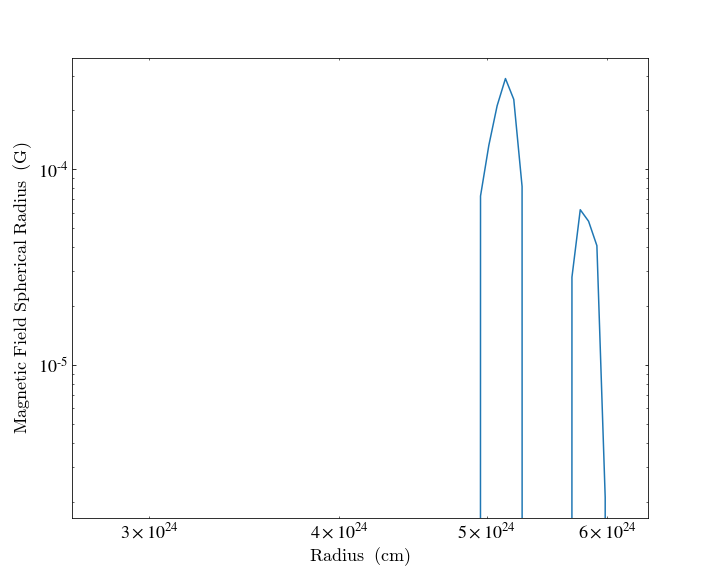
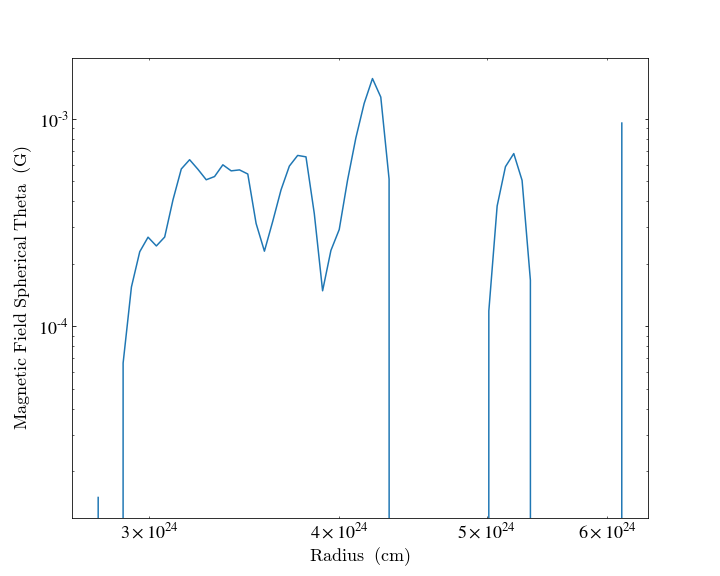
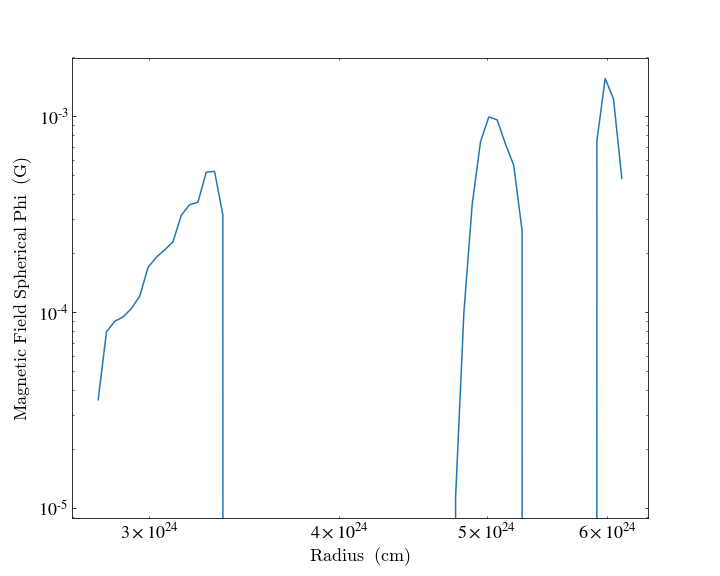

In [47]:

plot0500 = yt.ProfilePlot(my_sphere0500, "radius", ["magnetic_field_spherical_radius","magnetic_field_spherical_theta","magnetic_field_spherical_phi"],
                      weight_field=None)
print("after 0500")
plot0500.show()

In [54]:
list_all_fieldnames("../processed-data/1to1_b0"+"_mag.hdf5")

profiles_0000
-- density_mean
-- density_stddev
-- entropy_mean
-- entropy_stddev
-- kT_mean
-- kT_stddev
-- radius
profiles_0000_80b
-- density_mean
-- density_stddev
-- entropy_mean
-- entropy_stddev
-- kT_mean
-- kT_stddev
-- radius
profiles_0000_gpot_afterfix
-- density_mean
-- density_stddev
-- density_total_mean
-- density_total_stddev
-- kT_mean
-- kT_stddev
-- magnetic_field_spherical_phi_mean
-- magnetic_field_spherical_phi_stddev
-- magnetic_field_spherical_radius_mean
-- magnetic_field_spherical_radius_stddev
-- magnetic_field_spherical_theta_mean
-- magnetic_field_spherical_theta_stddev
-- radius
-- velocity_spherical_phi_mean
-- velocity_spherical_phi_stddev
-- velocity_spherical_radius_mean
-- velocity_spherical_radius_stddev
-- velocity_spherical_theta_mean
-- velocity_spherical_theta_stddev
profiles_0020
-- density_mean
-- density_stddev
-- entropy_mean
-- entropy_stddev
-- kT_mean
-- kT_stddev
-- radius
profiles_0020_80b
-- density_mean
-- density_stddev
-- entropy_mea

-- magnetic_field_spherical_phi_stddev
-- magnetic_field_spherical_radius_mean
-- magnetic_field_spherical_radius_stddev
-- magnetic_field_spherical_theta_mean
-- magnetic_field_spherical_theta_stddev
-- radius
-- velocity_spherical_phi_mean
-- velocity_spherical_phi_stddev
-- velocity_spherical_radius_mean
-- velocity_spherical_radius_stddev
-- velocity_spherical_theta_mean
-- velocity_spherical_theta_stddev
time_series_0.15r_500
-- centers
-- internal_energy
-- kinetic_energy
-- magnetic_energy
-- mass
-- time
-- turbulent_kinetic_energy
time_series_0.15r_500_100part
-- centers
-- internal_energy
-- kinetic_energy
-- magnetic_energy
-- mass
-- time
-- turbulent_kinetic_energy
time_series_1.0r_500
-- centers
-- internal_energy
-- kinetic_energy
-- magnetic_energy
-- mass
-- time
-- turbulent_kinetic_energy
time_series_1.0r_500_100part
-- centers
-- internal_energy
-- kinetic_energy
-- magnetic_energy
-- mass
-- time
-- turbulent_kinetic_energy


In [3]:
ds0500.derived_field_list

[('all', 'mesh_id'),
 ('all', 'particle_accx'),
 ('all', 'particle_accy'),
 ('all', 'particle_accz'),
 ('all', 'particle_angular_momentum'),
 ('all', 'particle_angular_momentum_magnitude'),
 ('all', 'particle_angular_momentum_x'),
 ('all', 'particle_angular_momentum_y'),
 ('all', 'particle_angular_momentum_z'),
 ('all', 'particle_blk'),
 ('all', 'particle_clr1'),
 ('all', 'particle_clr2'),
 ('all', 'particle_cylindrical_velocity_theta'),
 ('all', 'particle_cylindrical_velocity_z'),
 ('all', 'particle_dens'),
 ('all', 'particle_gpot'),
 ('all', 'particle_halo'),
 ('all', 'particle_index'),
 ('all', 'particle_magp'),
 ('all', 'particle_magx'),
 ('all', 'particle_magy'),
 ('all', 'particle_magz'),
 ('all', 'particle_mass'),
 ('all', 'particle_metl'),
 ('all', 'particle_oacx'),
 ('all', 'particle_oacy'),
 ('all', 'particle_oacz'),
 ('all', 'particle_ones'),
 ('all', 'particle_position'),
 ('all', 'particle_position_cylindrical_radius'),
 ('all', 'particle_position_cylindrical_theta'),
 ('a